<a href="https://colab.research.google.com/github/alinavandreeva/alinavandreeva/blob/main/HW5_nlp_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Загрузим датасет для анализа тональности текстов

In [2]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [4]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [5]:
for i in dataset['validation']:
  unique_labels.add(i['sentiment'])

for i in dataset['test']:
  unique_labels.add(i['sentiment'])

In [18]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок
trains = {}
validations = {}
tests = {}

for i in dataset['train']:
  sentiment = i['sentiment']
  if sentiment in trains:
    trains[sentiment] += 1
  else:
    trains[sentiment] = 1

for i in dataset['validation']:
  sentiment = i['sentiment']
  if sentiment in validations:
    validations[sentiment] += 1
  else:
    validations[sentiment] = 1

for i in dataset['test']:
  sentiment = i['sentiment']
  if sentiment in tests:
    tests[sentiment] += 1
  else:
    tests[sentiment] = 1

print(f'Данные обучающей выборки')
print('---')
print(f"Положительные метки: {trains['positive']} единиц")
print(f"Отрицательные метки: {trains['negative']} единиц")
print(f"Нейтральные метки: {trains['neutral']} единиц \n")
print(f'Данные проверочные выборки')
print(f"Положительные метки: {validations['positive']} единиц")
print(f"Отрицательные метки: {validations['negative']} единиц")
print(f"Нейтральные метки: {validations['neutral']} единиц \n")
print(f'Данные тестовой выборки')
print(f"Положительные метки: {tests['positive']} единиц")
print(f"Отрицательные метки: {tests['negative']} единиц")
print(f"Нейтральные метки: {tests['neutral']} единиц")

Данные обучающей выборки
---
Положительные метки: 10478 единиц
Отрицательные метки: 9105 единиц
Нейтральные метки: 11649 единиц 

Данные проверочные выборки
Положительные метки: 1760 единиц
Отрицательные метки: 1517 единиц
Нейтральные метки: 1928 единиц 

Данные тестовой выборки
Положительные метки: 1730 единиц
Отрицательные метки: 1546 единиц
Нейтральные метки: 1930 единиц


In [20]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

train_total = sum(trains.values())
validation_total = sum(validations.values())
test_total = sum(tests.values())

def calculation_percentage(count, total):
  return count / total * 100 if total > 0 else 0

print(f'Данные обучающей выборки')
print('---')
print(f"Положительные метки составляют {calculation_percentage(trains.get('positive', 0), train_total):.2f} % обучающей выборки")
print(f"Отрицательные метки составляют {calculation_percentage(trains.get('negative', 0), train_total):.2f} % обучающей выборки")
print(f"Нейтральные метки составляют {calculation_percentage(trains.get('neutral', 0), train_total):.2f} % обучающей выборки \n")
print(f'Данные проверочные выборки')
print(f"Положительные метки составляют {calculation_percentage(validations.get('positive', 0), validation_total):.2f} % проверочной выборки")
print(f"Отрицательные метки составляют {calculation_percentage(validations.get('negative', 0), validation_total):.2f} % проверочной выборки")
print(f"Нейтральные метки составляют {calculation_percentage(validations.get('neutral',0), validation_total):.2f} % проверочной выборки \n")
print(f'Данные тестовой выборки')
print(f"Положительные метки составляют {calculation_percentage(tests.get('positive', 0), test_total):.2f} % тестовой выборки")
print(f"Отрицательные метки составляют {calculation_percentage(tests.get('negative', 0), test_total):.2f} % тестовой выборки")
print(f"Нейтральные метки составляют {calculation_percentage(tests.get('neutral', 0), test_total):.2f} % тестовой выборки")

Данные обучающей выборки
---
Положительные метки составляют 33.55 % обучающей выборки
Отрицательные метки составляют 29.15 % обучающей выборки
Нейтральные метки составляют 37.30 % обучающей выборки 

Данные проверочные выборки
Положительные метки составляют 33.81 % проверочной выборки
Отрицательные метки составляют 29.15 % проверочной выборки
Нейтральные метки составляют 37.04 % проверочной выборки 

Данные тестовой выборки
Положительные метки составляют 33.23 % тестовой выборки
Отрицательные метки составляют 29.70 % тестовой выборки
Нейтральные метки составляют 37.07 % тестовой выборки


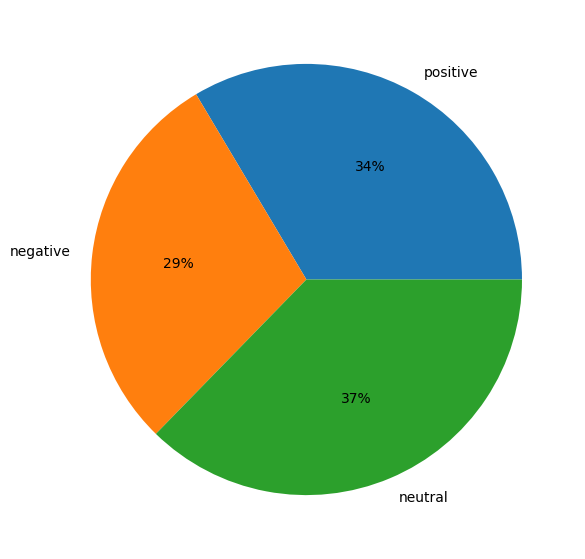

In [22]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [calculation_percentage(trains.get('positive', 0), train_total),
        calculation_percentage(trains.get('negative', 0), train_total),
        calculation_percentage(trains.get('neutral', 0), train_total)]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

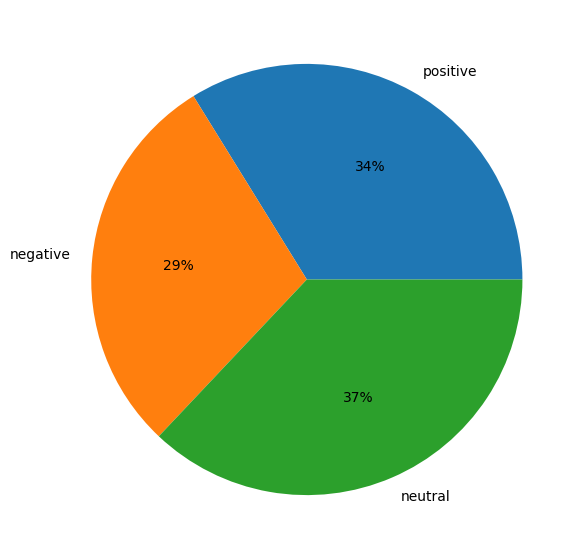

In [23]:
# Сделаем то же самое для проверочной выборки
data = [calculation_percentage(validations.get('positive', 0), validation_total),
        calculation_percentage(validations.get('negative', 0), validation_total),
        calculation_percentage(validations.get('neutral', 0), validation_total)]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

plt.show()

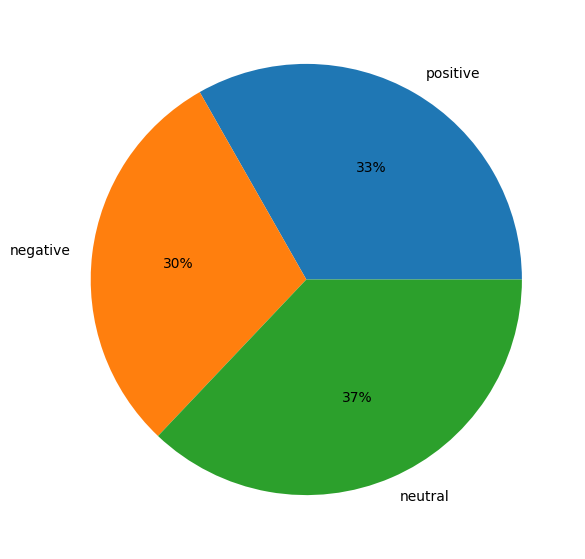

In [24]:
# Сделаем то же самое для тестовой выборки
data = [calculation_percentage(tests.get('positive', 0), test_total),
        calculation_percentage(tests.get('negative', 0), test_total),
        calculation_percentage(tests.get('neutral', 0), test_total)]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [25]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [26]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [27]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [28]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [29]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [30]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [31]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [32]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [33]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [84]:
sample = dataset['train']['text']
sample[:5]
# Выведите первые 5 текстов

['Cooking microwave pizzas, yummy',
 'Any plans of allowing sub tasks to show up in the widget?',
 " I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha",
 ' naw idk what ur talkin about',
 ' That sucks to hear. I hate days like that']

In [85]:
import re

def remove_punctuation(text):

    # Допишите функцию
    pattern = r'[^\w\s]' # r'\W+' либо [^\w\s]
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text

cleaned_sample = [remove_punctuation(text) for text in sample]
print(cleaned_sample)

['Cooking microwave pizzas yummy', 'Any plans of allowing sub tasks to show up in the widget', ' I love the humor I just reworded it Like saying group therapy insteada gang banging Keeps my moms off my back   Hahaha', ' naw idk what ur talkin about', ' That sucks to hear I hate days like that', ' Umm yeah Thats probably a pretty good note to self because eeeeeewwwwwwww', ' whatever do you mean', ' That would panic me a little  Maybe you can read on an orbitron at the gym like I dowhen all else fails', 'Is sad when peoples phones are dead', '  sad face', 'In cafe management the end of the month is nothing but numbers My arty little head hurts from finding discrepencies', 'Basically Ive listened to Miley Cyrus for fourteen hours now and I love it', ' what did you think of the finale  I thought it was kind of a cheap way out', ' I think that boat sailed my friend The few CCOs that had them had them months ago  I wish you luck though', 'Gave my mommy her Mothers Day present Tickets to Aero

2. Создадим список токенов для каждого текста с помощью SpaCy

In [90]:
for text in cleaned_sample:
  doc = nlp(text)
  for token in doc:
    print(token.text)

Выходные данные были обрезаны до нескольких последних строк (5000).
Shell
Wake
Up
To
A
Banner
And
Balloons
Woo
_
  
Good
evening
kind
sir
bows
 
httpblipfm5z7zv
 
hot
weather
for
the
lose
And
I
have
to
clean
too
 
Cleaning
in
the
heat
sucks
balls
   
Delayscancellations
really
bite
Have
had
my
fair
share
and
can
sympathize
Hang
tough
i
get
a
message
that
my
account
is
suspended
as
far
as
i
know
i
have
nt
violated
any
terms
contacting
twitter
now
ahhhh
now
i
have
no
pic
 
seriouslyit
only
gets
sadder
 
Thanks
for
the
thoughts
Unfortunatly
it
did
nt
work
out
like
we
hoped
ah
well
The
paintings
were
beautiful
 
Thanks
I
registered
sorry
paul
scheuring
but
prison
break
series
finale
sucked
in
so
many
levels
bonjour
San
Francisco
My
back
hurts
from
last
night
_
2008
thanks
 
there
s
a
mens
version
in
June
Its
very
popular
 
it
is
and
its
shiny
and
if
i
could
marry
it
i
would
  
ps
i
m
good
you
_
_
Hell
beeeeaaaaatooooo
App
is
good
but
no
task
sync
between
devices
is
a
big
let
down
Oh
noes
 

3. Частеречная разметка: создаем список частей речи для каждого токена

In [91]:
for text in cleaned_sample:
  doc = nlp(text)
  for token in doc:
    print(token.pos_)

Выходные данные были обрезаны до нескольких последних строк (5000).
SPACE
PROPN
PROPN
ADP
ADP
DET
PROPN
CCONJ
PROPN
PROPN
PUNCT
SPACE
ADJ
NOUN
NOUN
PROPN
VERB
SPACE
NOUN
SPACE
ADJ
NOUN
ADP
DET
NOUN
CCONJ
PRON
VERB
PART
VERB
ADV
SPACE
NOUN
ADP
DET
NOUN
VERB
NOUN
SPACE
NOUN
ADV
VERB
AUX
VERB
PRON
ADJ
NOUN
CCONJ
AUX
VERB
PROPN
ADJ
PRON
VERB
DET
NOUN
PRON
PRON
NOUN
AUX
VERB
ADV
ADV
SCONJ
PRON
VERB
PRON
AUX
PART
VERB
DET
NOUN
VERB
NOUN
ADV
ADV
ADV
PRON
VERB
DET
NOUN
SPACE
VERB
ADV
VERB
ADJ
SPACE
NOUN
ADP
DET
NOUN
PROPN
PRON
AUX
PART
VERB
ADP
SCONJ
PRON
VERB
INTJ
INTJ
DET
NOUN
AUX
ADJ
SPACE
NOUN
PRON
VERB
INTJ
PROPN
NOUN
CCONJ
NOUN
PROPN
NOUN
NOUN
VERB
ADP
ADV
ADJ
NOUN
VERB
PROPN
PROPN
PRON
NOUN
VERB
ADP
ADJ
NOUN
PUNCT
NUM
NOUN
SPACE
PRON
VERB
DET
NOUN
NOUN
ADP
PROPN
PRON
ADV
ADJ
SPACE
PRON
AUX
CCONJ
PRON
ADJ
CCONJ
SCONJ
PRON
AUX
VERB
PRON
PRON
AUX
SPACE
VERB
PRON
VERB
ADJ
PRON
PUNCT
PUNCT
NOUN
VERB
PROPN
AUX
ADJ
CCONJ
DET
NOUN
NOUN
ADP
NOUN
AUX
DET
ADJ
NOUN
ADP
INTJ
NOUN
SPACE
VERB
ADJ
NOUN

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [75]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

In [93]:
pos_annotation = []
text_count = 0

for text in cleaned_sample:
    text_count += 1
    print(f'Текст {text_count}')
    if text_count == 6:
        break

    doc = nlp(text)
    word_count = 0
    for token in doc:
        pos_annotation.append((token.text, token.pos_))
        word_count += 1
        print(f'{token.text} -> {token.pos_}')

        if word_count == 4:
            break

Текст 1
Cooking -> NOUN
microwave -> NOUN
pizzas -> VERB
yummy -> ADV
Текст 2
Any -> DET
plans -> NOUN
of -> ADP
allowing -> VERB
Текст 3
  -> SPACE
I -> PRON
love -> VERB
the -> DET
Текст 4
  -> SPACE
naw -> PROPN
idk -> NOUN
what -> PRON
Текст 5
  -> SPACE
That -> PRON
sucks -> VERB
to -> PART
Текст 6


5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [95]:
# Для каждого текста из выбранного среза: допишите этот код
ner_annotation = []
for text in cleaned_sample:
  doc = nlp(text)
for token in doc.ents:
  ner_annotation.append((token, token.label_))

for i in range(6, min(19, len(cleaned_sample))):
  doc = nlp(cleaned_sample[i])
  ner_annotation.append([(ent, ent.label_) for ent in doc.ents])
  print([(ent, ent.label_) for ent in doc.ents])
  # Применим к тексту nlp: допишите этот код
 # Выведем именованную сущность и ее лейбл

[]
[]
[]
[]
[(the end of the month, 'DATE')]
[(Miley, 'PERSON'), (fourteen hours, 'TIME')]
[]
[(months ago, 'DATE')]
[(Mothers Day, 'EVENT'), (Aerosmith, 'PERSON'), (Yay, 'PERSON')]
[(Mac, 'PERSON'), (safari, 'PERSON')]
[]
[]
[(Early monday, 'DATE'), (Only a few weeks, 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [96]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
text = 'English texts for beginners to practice reading and comprehension online and for free. Practicing your comprehension of written English will both improve your vocabulary and understanding of grammar and word order. The texts below are designed to help you develop while giving you an instant evaluation of your progress.'
doc = nlp(text)
ner_annotation = []
for token in doc.ents:
  ner_annotation.append((token, token.label_))
ner_annotation = [(ent.text, ent.label_) for ent in doc.ents]
displacy.render(doc, style="ent", jupyter=True)
### здесь укажите любой нетокенизированный текст из датасета с помощью индексации ###), style="ent", jupyter=True)